## Binary System Orbit with Euler-Cromer Method

In [1]:
# import the packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the constants

G = 4*(np.pi**2) # gravitational constant units: AU^3/yr^2
M1 = M2 = 0.5 # solar mass ... makes equations easier. Total solar mass = 1 for the system
R = 1 # AU for circular orbits

In [3]:
# initialising variables / initial conditions

# initial position = x0 and y0 (in AU)
# initial velocity = v_x and v_y (in AU/yr)

# initial position
x0 = 1
y0 = 0

# initial velocity
v_x = 0
v_y = np.pi

In [4]:
# Using Kepler's Third Law, the equation of a period of a circular orbit is

T = np.sqrt(((4*(np.pi**2))/G*M1)*R**3)

# the time step - small iteration for the loop to show the approximate motion at that time for that x amount of time

dt = 0.0015
step = int(T/dt)    # how many years iteration

# to store the trajectories, use arrays
xvalues = [x0]
yvalues = [y0]

# initialise the variables so that it uses after the ones stored in the array
x = x0
y = y0

# to be used when the volecity is getting updated
vx = v_x
vy = v_y

energies = []
times = []

In [5]:
# position of the stars
star1 = np.array([-0.2, 0.0])   # left origin
star2 = np.array([0.2, 0.0])    # right origin

# Using the Euler-Cromer loop  

for i in range(step):
    # distance to star 1
    dx1, dy1 = x - star1[0], y - star1[1]
    r1 = np.sqrt(dx1**2 + dy1**2)    # distance from the star circular orbit and modulus
    ax1, ay1 = -(G*M1*dx1)/(r1**3), -(G*M1*dy1)/(r1**3)    # acceleration in the x and y direction

    # distance to star 2
    dx2, dy2 = x - star2[0], y - star2[1]
    r2 = np.sqrt(dx2**2 + dy2**2)    # distance from the star circular orbit and modulus
    ax2, ay2 = -(G*M2*dx2)/(r2**3), -(G*M2*dy2)/(r2**3)    # acceleration in the x and y direction

    # total acceleration
    ax = ax1+ax2
    ay = ay1+ay2
    
    # updating the velocity
    vx += dt*ax
    vy += dt*ay

    # updating the position vector
    x += dt*vx
    y += dt*vy

    # adds the new trajectories to the end of the list
    # snapshot interval to only add every 2nd value
    snap = 20
    if i % snap == 0:
        xvalues.append(x)
        yvalues.append(y)

    # energy time graph
    KE = 0.5*(M1 + M2)*(vx**2 + vy**2)
    PE = -G*(M1)/r1 - G*(M2)/r2

    energies.append(KE + PE)
    times.append(i*dt)
            

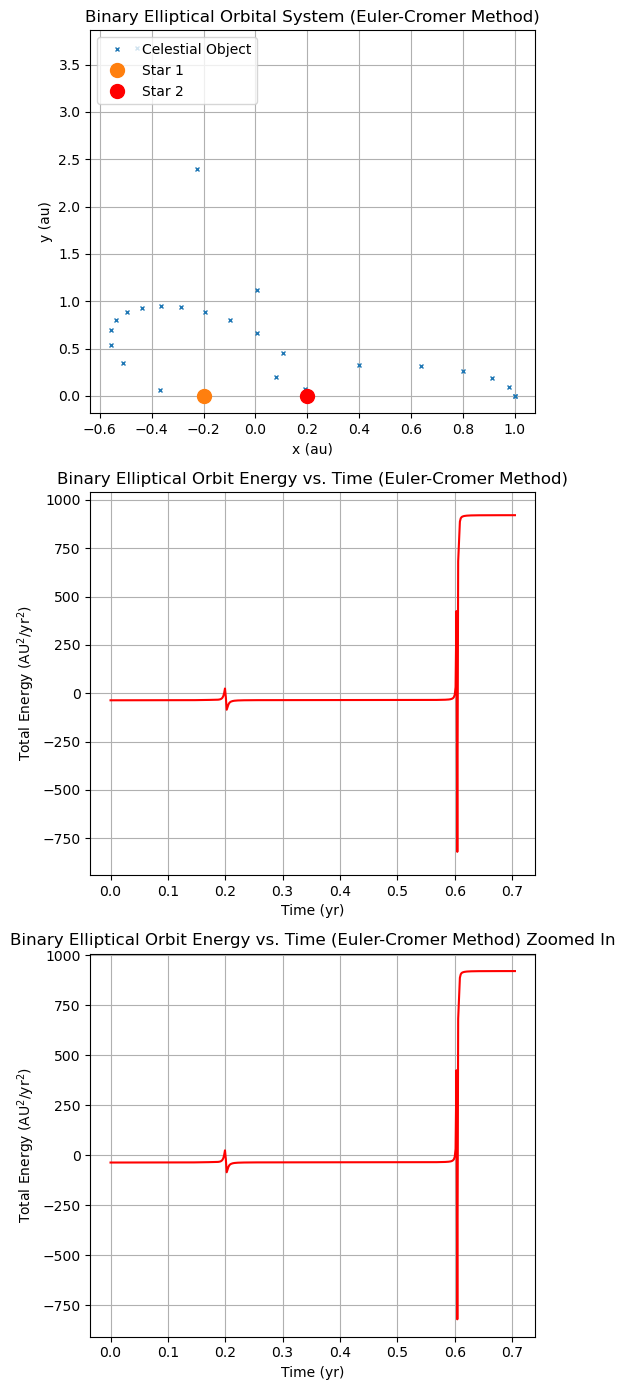

In [10]:
plt.figure(figsize=(5.5,14))

# plotting the loop
plt.subplot(3,1,1)
plt.plot(xvalues, yvalues, 'x', markersize = 3, label = "Celestial Object") # orbit of the object
plt.plot(star1[0], star1[1], "o", markersize = 10, label = "Star 1")
plt.plot(star2[0], star2[1], "ro", markersize = 10, label = "Star 2")
plt.title('Binary Elliptical Orbital System (Euler-Cromer Method)')
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc='upper left')
plt.grid()

# energy time graph
plt.subplot(3,1,2)
plt.plot(times, energies, color='red')
plt.ylim(min(energies)-120, max(energies)+120)
plt.title('Binary Elliptical Orbit Energy vs. Time (Euler-Cromer Method)')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()

# energy time plot zoomed in
plt.subplot(3,1,3)
plt.plot(times, energies, color='red')
plt.title('Binary Elliptical Orbit Energy vs. Time (Euler-Cromer Method) Zoomed In')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()

plt.tight_layout()

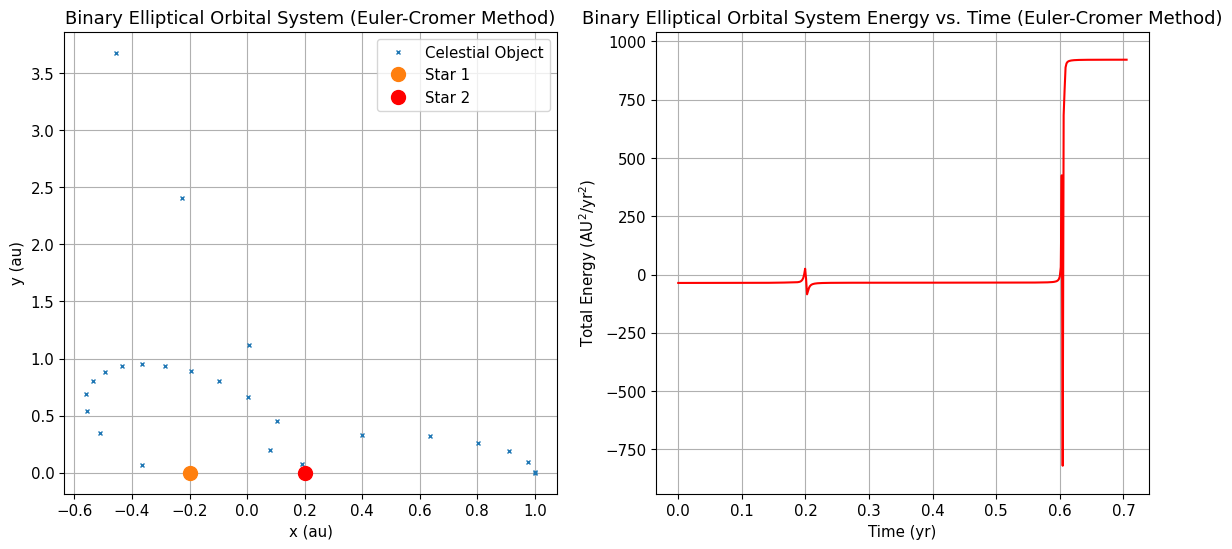

In [12]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 10.8})

# plotting the loop
plt.subplot(1,2,1)
plt.plot(xvalues, yvalues, 'x', markersize = 3, label = "Celestial Object") # orbit of the object
plt.plot(star1[0], star1[1], "o", markersize = 10, label = "Star 1")
plt.plot(star2[0], star2[1], "ro", markersize = 10, label = "Star 2")
plt.title('Binary Elliptical Orbital System (Euler-Cromer Method)')
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc='upper right')
plt.grid()

# energy time graph
plt.subplot(1,2,2)
plt.plot(times, energies, color='red')
plt.ylim(min(energies)-120, max(energies)+120)
plt.title('Binary Elliptical Orbital System Energy vs. Time (Euler-Cromer Method)')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()

